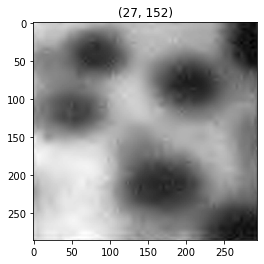

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np

from skimage.segmentation import watershed
from skimage.morphology import disk, square
from skimage.feature import peak_local_max

def pyplot_image_show(image,cmap = 'gray',alpha = 1):
    plt.figure()
    plt.imshow(image,cmap=cmap,alpha = alpha)
    plt.title(str((image.min(),image.max())))
    
def pyplot_comparative_show(image_1,image_2,cmap = 'gray',figsize = (18,9)):
    _,(ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(image_1,cmap='gray')
    ax2.imshow(image_2,cmap='gray')
    ax1.set_title(str((image_1.min(),image_1.max())))
    ax2.set_title(str((image_2.min(),image_2.max())))
    
    

image_stock = cv2.imread("WS.png", cv2.IMREAD_GRAYSCALE)
pyplot_image_show(image_stock)

In [2]:
disk(2)

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [3]:
square(3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [4]:
def show(image):
    plt.imshow(image, cmap='gray')
    plt.title(f'min {image.min()}\nmax {image.max()}')
    plt.show()

In [5]:
image1 = image
show(image1)
image1 = rank.mean(image1, square(10))
show(image1)

NameError: name 'image' is not defined

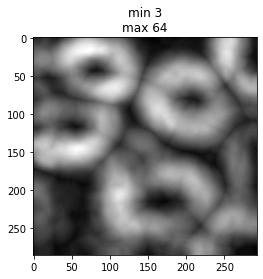

In [327]:
kernel_size = 30
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
image2 = cv2.morphologyEx(image1, cv2.MORPH_GRADIENT, kernel)
show(image2)

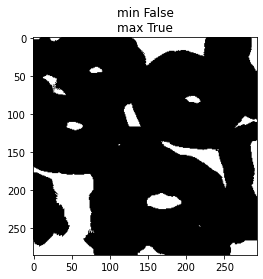

In [438]:
image3 = image2 < np.median(image2) / 2
show(image3)

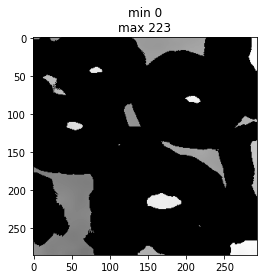

In [458]:
image4 = image3 * (255 - image1)
show(image4)

In [514]:
counts = []
thresholds = list(range(image4.min(), image4.max(), 10))
for threshold in thresholds:
    binarized = (image4 > threshold).astype('uint8')
    counts.append(cv2.connectedComponents(binarized)[0])
good_count = counts[int(len(counts) * 3/4)]
threshold = thresholds[counts.index(good_count)]

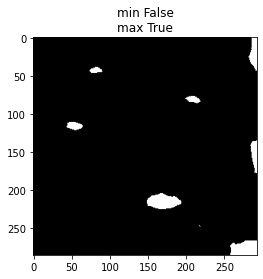

In [516]:
image5 = image4 > threshold
show(image5)

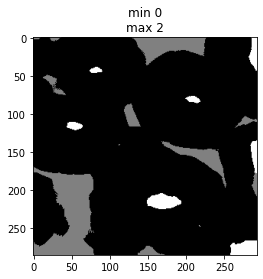

In [520]:
image6 = image3.astype('int') + image5.astype('int')
show(image6)

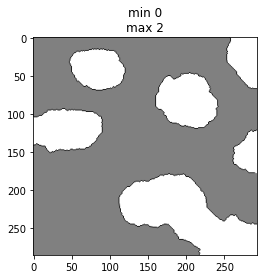

In [521]:
image7 = watershed(image2, image6, watershed_line=True)
show(image7)

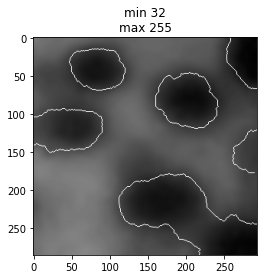

In [522]:
image8 = image1.copy()
image8[image7 == 0] = 255
show(image8)

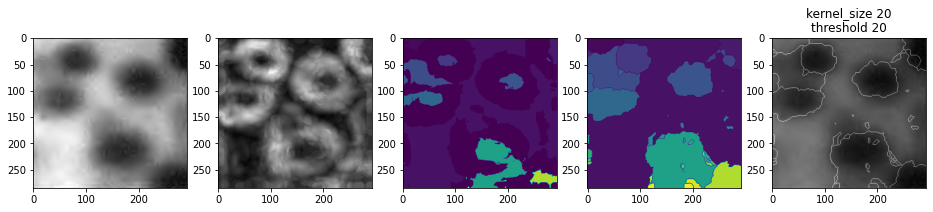

In [208]:
kernel_size = 20
threshold = 20

image = image_stock
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
morph_gradient = cv2.morphologyEx(image,cv2.MORPH_GRADIENT,kernel)
_, (ax0, ax1, ax2, ax3, ax4) = pyplot.subplots(1, 5, figsize=(16, 16))
ax0.imshow(image, cmap='gray')
ax1.imshow(morph_gradient, cmap='gray')
markers = morph_gradient < threshold
markers = ndi.label(markers)[0]
ax2.imshow(markers)
labels = watershed(morph_gradient, markers, watershed_line=True)
ax3.imshow(labels)
contours = labels == 0
ax4.imshow(image, cmap='gray')
ax4.imshow(contours, alpha=0.5, cmap='gray')
plt.title(f'kernel_size {kernel_size}\nthreshold {threshold}')
plt.show()